# Offline evaluation for single CASTLE NN R2 comparison

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printe
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [4]:
module_path = os.path.abspath(os.path.join('..'))
# Relative imports
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
from utils.setup import SetupDiagnostics
from neural_networks.load_models import load_single_model, get_save_plot_folder
from neural_networks.model_diagnostics import ModelDiagnostics
from utils.variable import Variable_Lev_Metadata
from pathlib import Path

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Load model and get ModelDescription

In [7]:
plot_dir = Path("../output_castle/training_23_custom_mirrored_sparsity/plots_offline_evaluation/single_plots_r2_comparison/")

In [8]:
var_name = "prect" # tphystnd-524.69, prect, fsnt

In [9]:
def get_model_desc(argv, variable):
    setup = SetupDiagnostics(argv)
        
    var_model = load_single_model(setup, variable)
    
    setup.model_type = setup.nn_type
    return ModelDiagnostics(setup=setup, models=var_model)


## Variable

In [10]:
import matplotlib.pyplot as plt

In [11]:
var = Variable_Lev_Metadata.parse_var_name(var_name)

## Evaluation plots CASTLE

### Lat-lon

In [12]:
argv_castle = ["-c", "../output_castle/training_23_custom_mirrored_sparsity/cfg_mirrored.yml"]
md_castle = get_model_desc(argv_castle, var_name)


Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_23_custom_mirrored_sparsity/models_castle_mirrored/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_20/6_0_model.keras


In [13]:
save_dir = os.path.join(plot_dir, "castle")

In [14]:
# Parameters
i_time = 1  # 'mean', 'range' --> range doesn't work
n_time = 1440  # about a month
n_samples = 1024  # 1024; 2048; 4096; 8192

# Additional params for setting plot color map range
vmin = False  # False, -3e-7
vmax = False  # False, 3e-7


Plotting double_xy for variable prect

Test batch size = 8192.
Saved plot prect_map_time-1-1440steps.png.


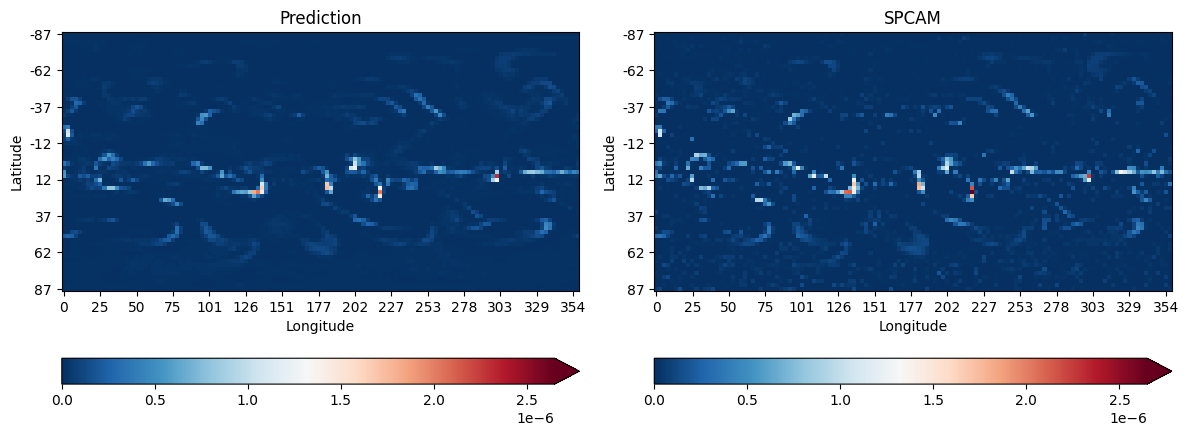

In [16]:
fig, axes = md_castle.plot_double_xy(i_time, var, diff=False, nTime=n_time, cmap="RdBu_r", show_plot=True, save=plot_dir)



Plotting double_xy for variable prect

Test batch size = 8192.
Time samples: 1440
Saved plot prect_map_time-1-1440steps_stats.png.


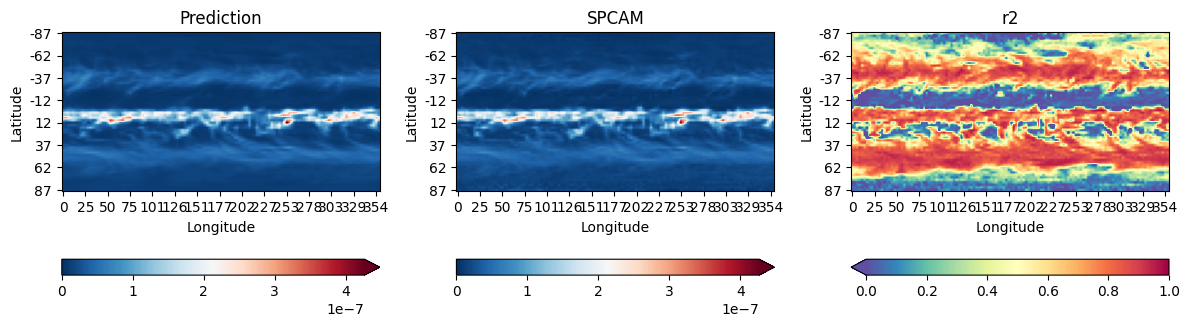

In [17]:
fig, axes = md_castle.plot_double_xy(i_time, var, diff=False, nTime=n_time, stats='r2', cmap="RdBu_r", show_plot=True, save=plot_dir)



Plotting double_xy for variable prect

Test batch size = 8192.
Saved plot prect_map_time-1-1440steps_diff.png.


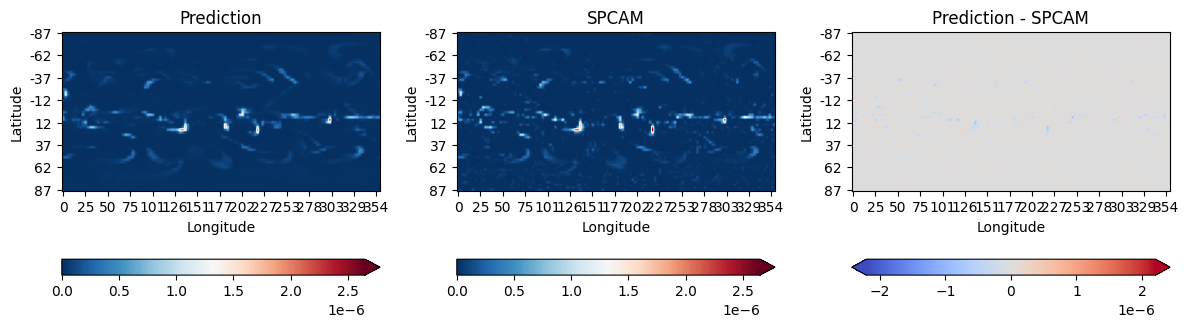

In [15]:
fig, axes = md_castle.plot_double_xy(i_time, var, diff=True, nTime=n_time, cmap="RdBu_r", show_plot=True, save=plot_dir)


In [19]:
md_castle.compute_stats('range', var, nTime=n_time)


Test batch size = 8192.
Time samples: 1440


NameError: name 'md' is not defined

In [20]:
md_castle.stats

{'hor_tsqmean': 1.9285970748918967e-14,
 'hor_tmean': 3.8232942259022e-08,
 'hor_mse': 3.0025501836931535e-15,
 'hor_tvar': 1.7824212875137258e-14,
 'hor_r2': 0.8315465482416131}

In [17]:
# Parameters
i_time = 'mean'  # 'mean', 'range' --> range doesn't work
n_time = 1440  # about a month
n_samples = 1024  # 1024; 2048; 4096; 8192
stats = 'r2'

# Additional params for setting plot color map range
vmin = False  # False, -3e-7
vmax = False  # False, 3e-7


Plotting double_xy for variable prect

Test batch size = 8192.
Time samples: 1440
Saved plot prect_map_time-mean-1440steps.png.


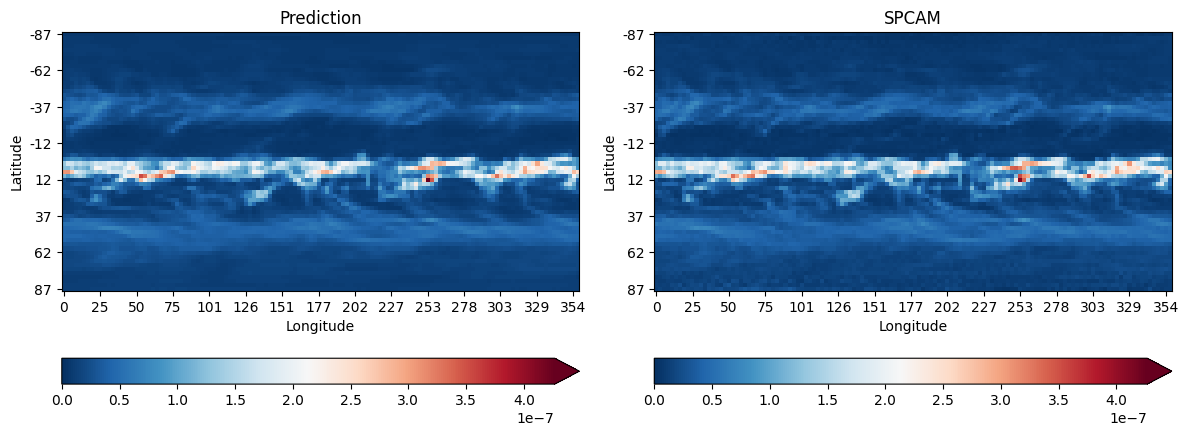

In [18]:
fig, axes = md_castle.plot_double_xy(i_time, var, diff=False, nTime=n_time, cmap="RdBu_r", show_plot=True, save=plot_dir)

## Evaluation Plots Single NN

In [21]:
argv_single_nn = ["-c", "./diagnostic_configs/cfg_single_nn_diagnostics.yml"]


In [22]:
md_single_nn = get_model_desc(argv_single_nn, var_name)

save_dir = os.path.join(plot_dir, "single_nn")


Load model: /work/bd1179/b309172/analysis/usmile/causality_convection/python/causalnncam/models_causal_links-tb_train-tb/SingleNN/hl_256_256_256_256_256_256_256_256_256-act_LeakyReLU-e_18/6_0_model.h5


In [23]:
# Parameters
i_time = 1  # 'mean', 'range' --> range doesn't work
n_time = 1440  # about a month
n_samples = 1024  # 1024; 2048; 4096; 8192

# Additional params for setting plot color map range
vmin = False  # False, -3e-7
vmax = False  # False, 3e-7


Plotting double_xy for variable prect

Test batch size = 8192.
Saved plot prect_map_time-1-1440steps.png.


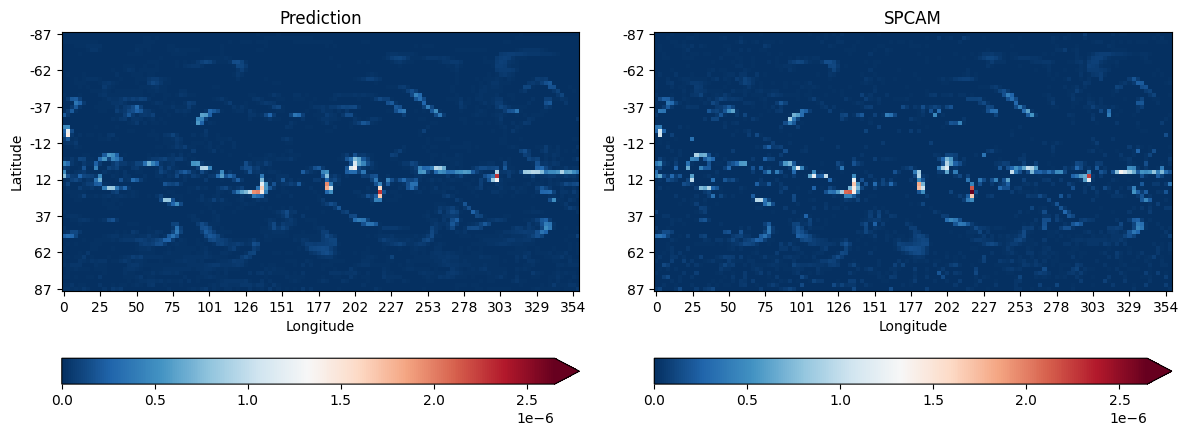

In [40]:
fig, axes = md_single_nn.plot_double_xy(i_time, var, diff=False, nTime=n_time, cmap="RdBu_r", show_plot=True, save=save_dir)



Plotting double_xy for variable prect

Test batch size = 8192.
Time samples: 1440
Saved plot prect_map_time-1-1440steps_stats.png.


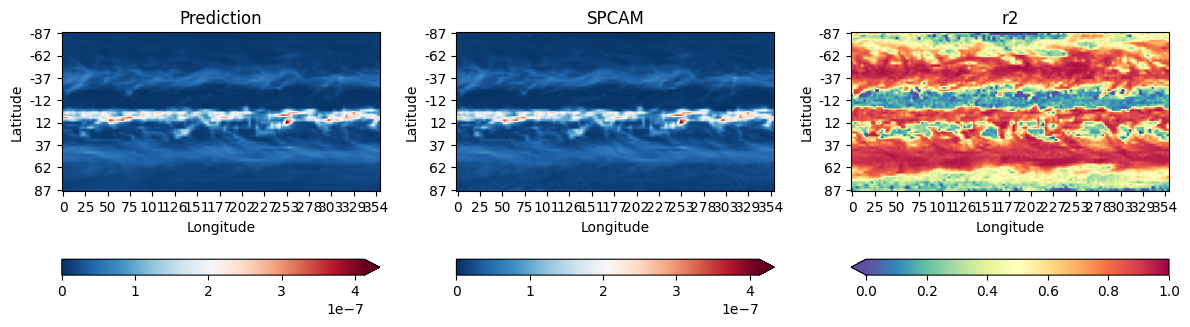

In [41]:
fig, axes = md_single_nn.plot_double_xy(i_time, var, diff=False, nTime=n_time, stats="r2", cmap="RdBu_r", show_plot=True, save=save_dir)


In [24]:
md_single_nn.compute_stats('range', var, nTime=n_time)


Test batch size = 8192.
Time samples: 1440
{'hor_tsqmean': 1.9285970748918967e-14, 'hor_tmean': 3.8232942259022e-08, 'hor_mse': 2.1186954521172206e-15, 'hor_tvar': 1.7824212875137258e-14, 'hor_r2': 0.8811338561226141}


In [25]:
md_single_nn.stats

{'hor_tsqmean': 1.9285970748918967e-14,
 'hor_tmean': 3.8232942259022e-08,
 'hor_mse': 2.1186954521172206e-15,
 'hor_tvar': 1.7824212875137258e-14,
 'hor_r2': 0.8811338561226141}

## Evaluation plots causal single NN

In [26]:
argv_causal_single_nn = ["-c", "./diagnostic_configs/cfg_causal_single_nn_diagnostics.yml"]

In [27]:
setup_causal_single_nn = SetupDiagnostics(argv_causal_single_nn)
        
var_model_causal_single_nn = load_single_model(setup_causal_single_nn, var)
    


Load model: /work/bd1179/b309172/analysis/usmile/causality_convection/python/causalnncam/models_arch-rasp_thrs-opt-mse6/CausalSingleNN/a0.01-toptimized-latwts/hl_256_256_256_256_256_256_256_256_256-act_LeakyReLU-e_18/6_0_model.h5


In [28]:
var_model_causal_single_nn[0.01]["optimized"]

{'prect': (<keras.engine.sequential.Sequential at 0x7ffe484b0ee0>,
  [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   44,
   45,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93])}

In [31]:
setup_causal_single_nn.model_type = setup_causal_single_nn.nn_type

md_causal_single_nn =  ModelDiagnostics(setup=setup_causal_single_nn, models=var_model_causal_single_nn[0.01]["optimized"])

In [32]:
save_dir = os.path.join(plot_dir, "causal_single_nn")

In [88]:
# Parameters
i_time = 1  # 'mean', 'range' --> range doesn't work
n_time = 1440  # about a month
n_samples = 1024  # 1024; 2048; 4096; 8192

# Additional params for setting plot color map range
vmin = False  # False, -3e-7
vmax = False  # False, 3e-7


Plotting double_xy for variable prect

Test batch size = 8192.
Saved plot prect_map_time-1-1440steps.png.


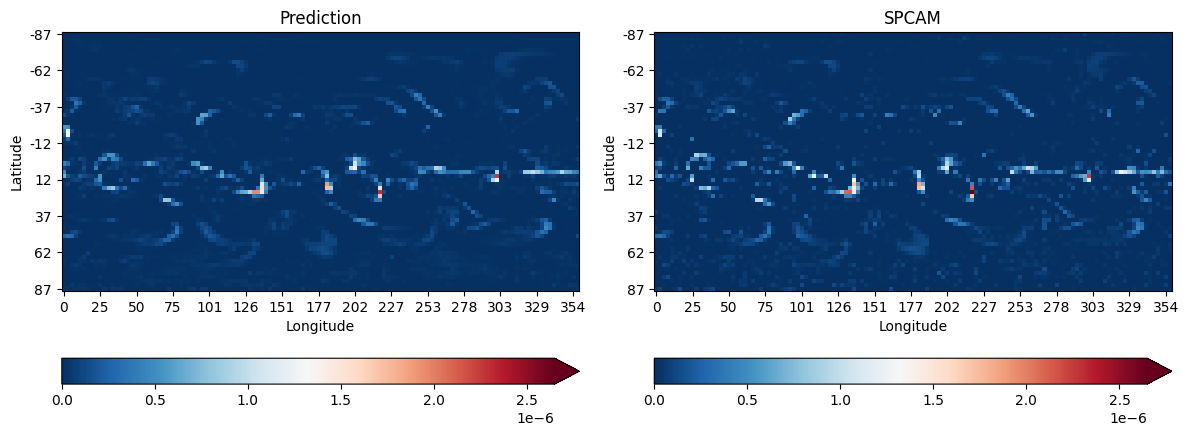

In [89]:
fig, axes = md_causal_single_nn.plot_double_xy(i_time, var, diff=False, nTime=n_time, cmap="RdBu_r", show_plot=True, save=save_dir)



Plotting double_xy for variable prect

Test batch size = 8192.
Time samples: 1440
Saved plot prect_map_time-1-1440steps_stats.png.


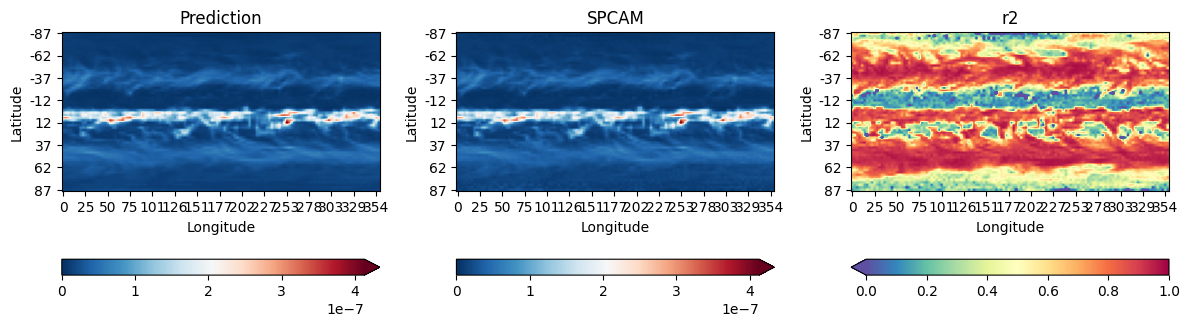

In [90]:
fig, axes = md_causal_single_nn.plot_double_xy(i_time, var, diff=False, nTime=n_time, stats="r2", cmap="RdBu_r", show_plot=True, save=save_dir)


In [33]:
md_causal_single_nn.compute_stats('range', var, nTime=n_time)


Test batch size = 8192.
Time samples: 1440


In [34]:
md_causal_single_nn.stats

{'hor_tsqmean': 1.9285970748918967e-14,
 'hor_tmean': 3.8232942259022e-08,
 'hor_mse': 2.1185126165454804e-15,
 'hor_tvar': 1.7824212875137258e-14,
 'hor_r2': 0.8811441138306554}

# Do not run!!!


Plotting double_xy for variable prect

Test batch size = 8192.


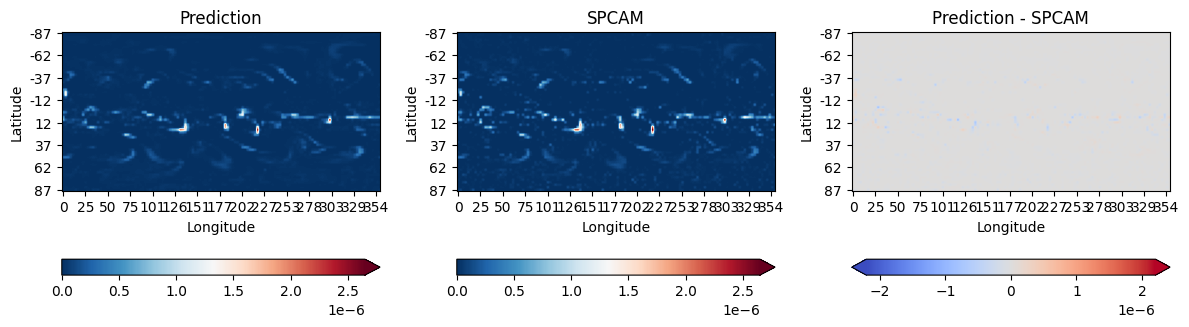

In [30]:
# training_7_mirrored_dict
fig, axes = model_desc.plot_double_xy(i_time, var, diff=True, nTime=n_time, cmap="RdBu_r", show_plot=True)


Plotting double_xy for variable prect

Test batch size = 8192.


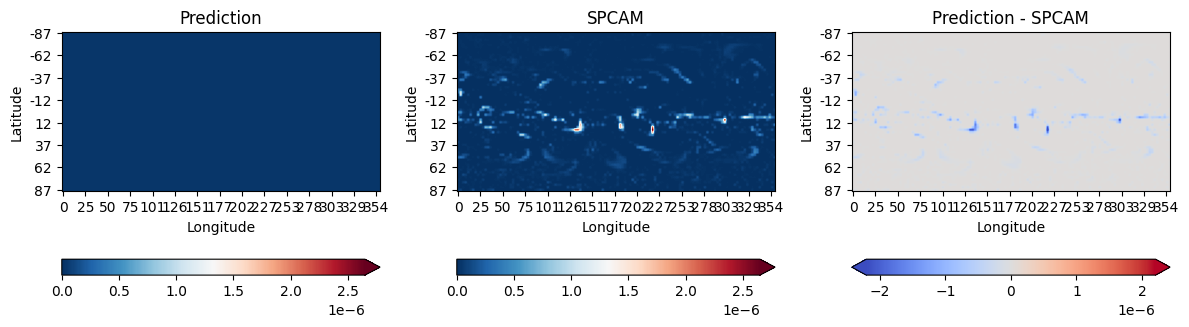

In [20]:
# training_9/training_10
fig, axes = model_desc.plot_double_xy(i_time, var, diff=True, nTime=n_time, cmap="RdBu_r", show_plot=True)